grads.device cpu


/tmp/ipykernel_28805/811752185.py:51: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/IndexingUtils.h:30.)
  losses = losses[mask]
/tmp/ipykernel_28805/811752185.py:52: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/IndexingUtils.h:30.)
  grads = grads[mask]
/tmp/ipykernel_28805/811752185.py:53: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272204863/work/aten/src/ATen/native/IndexingUtils.h:30.)
  steps = steps[mask]


fname /media/bdc/clm/DeformingTheLossSurface/Sparse-Sharpness-Aware-Minimization-main/logs/CIFAR10_base_bsz128_epoch200_resnet18_lr0.05_sgd_seed1234act_None_set_singlerun_coe0_1.0coe1_1.0coe2_1.01.0_0.93None1.0None2023-08-25-15:52:30/2023-08-28-12:18:40dim0gradient_norm_Iteration.pdf
Done


<Figure size 1980x1500 with 0 Axes>

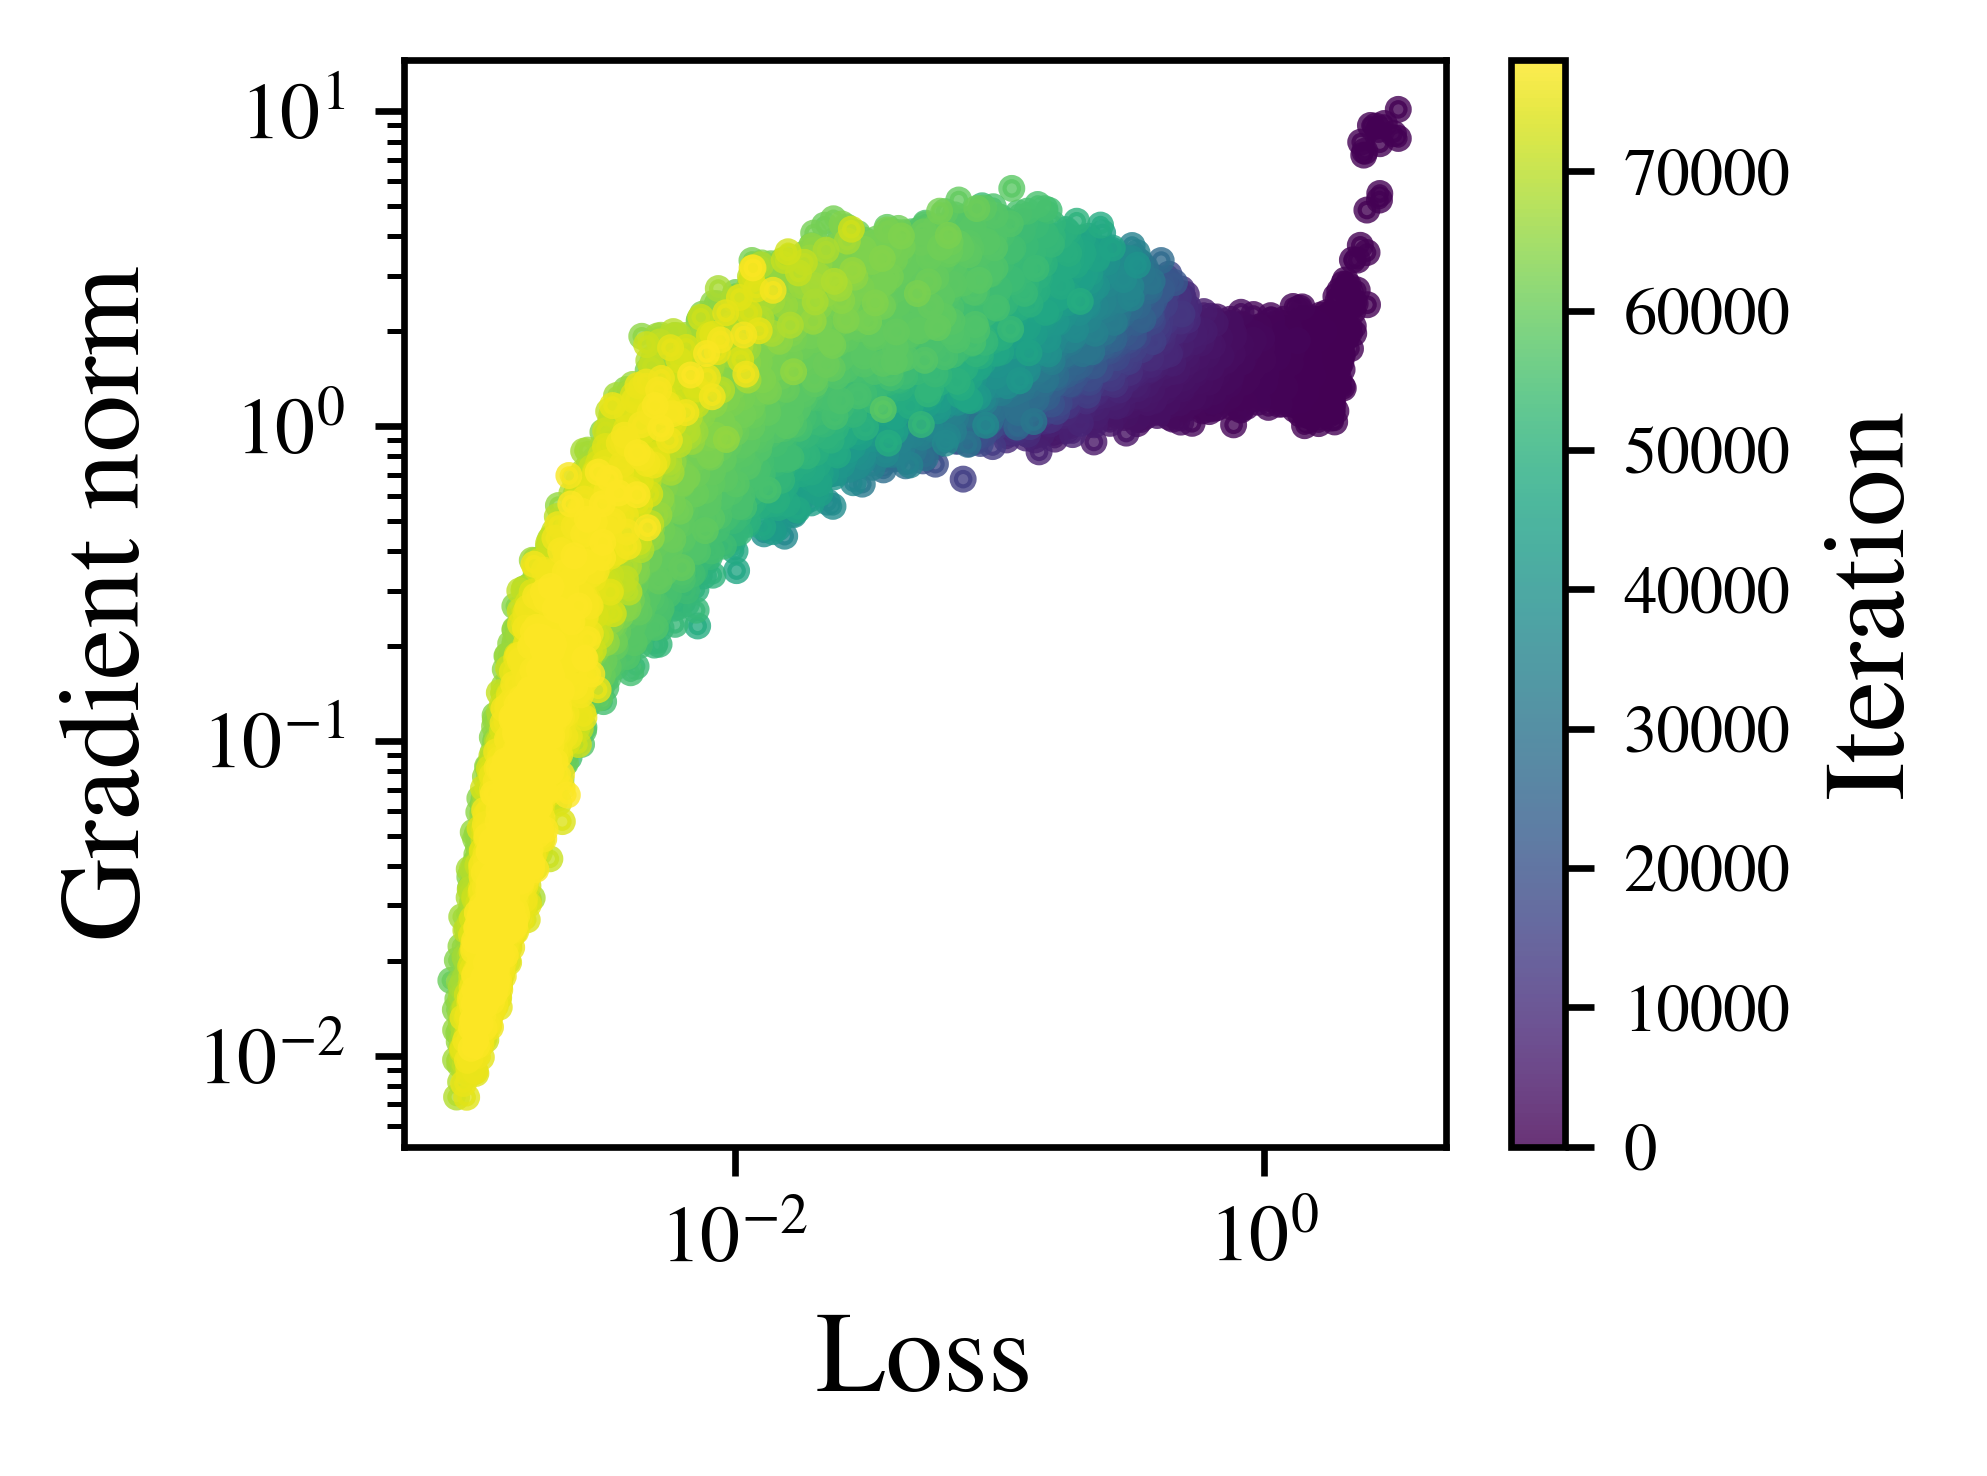

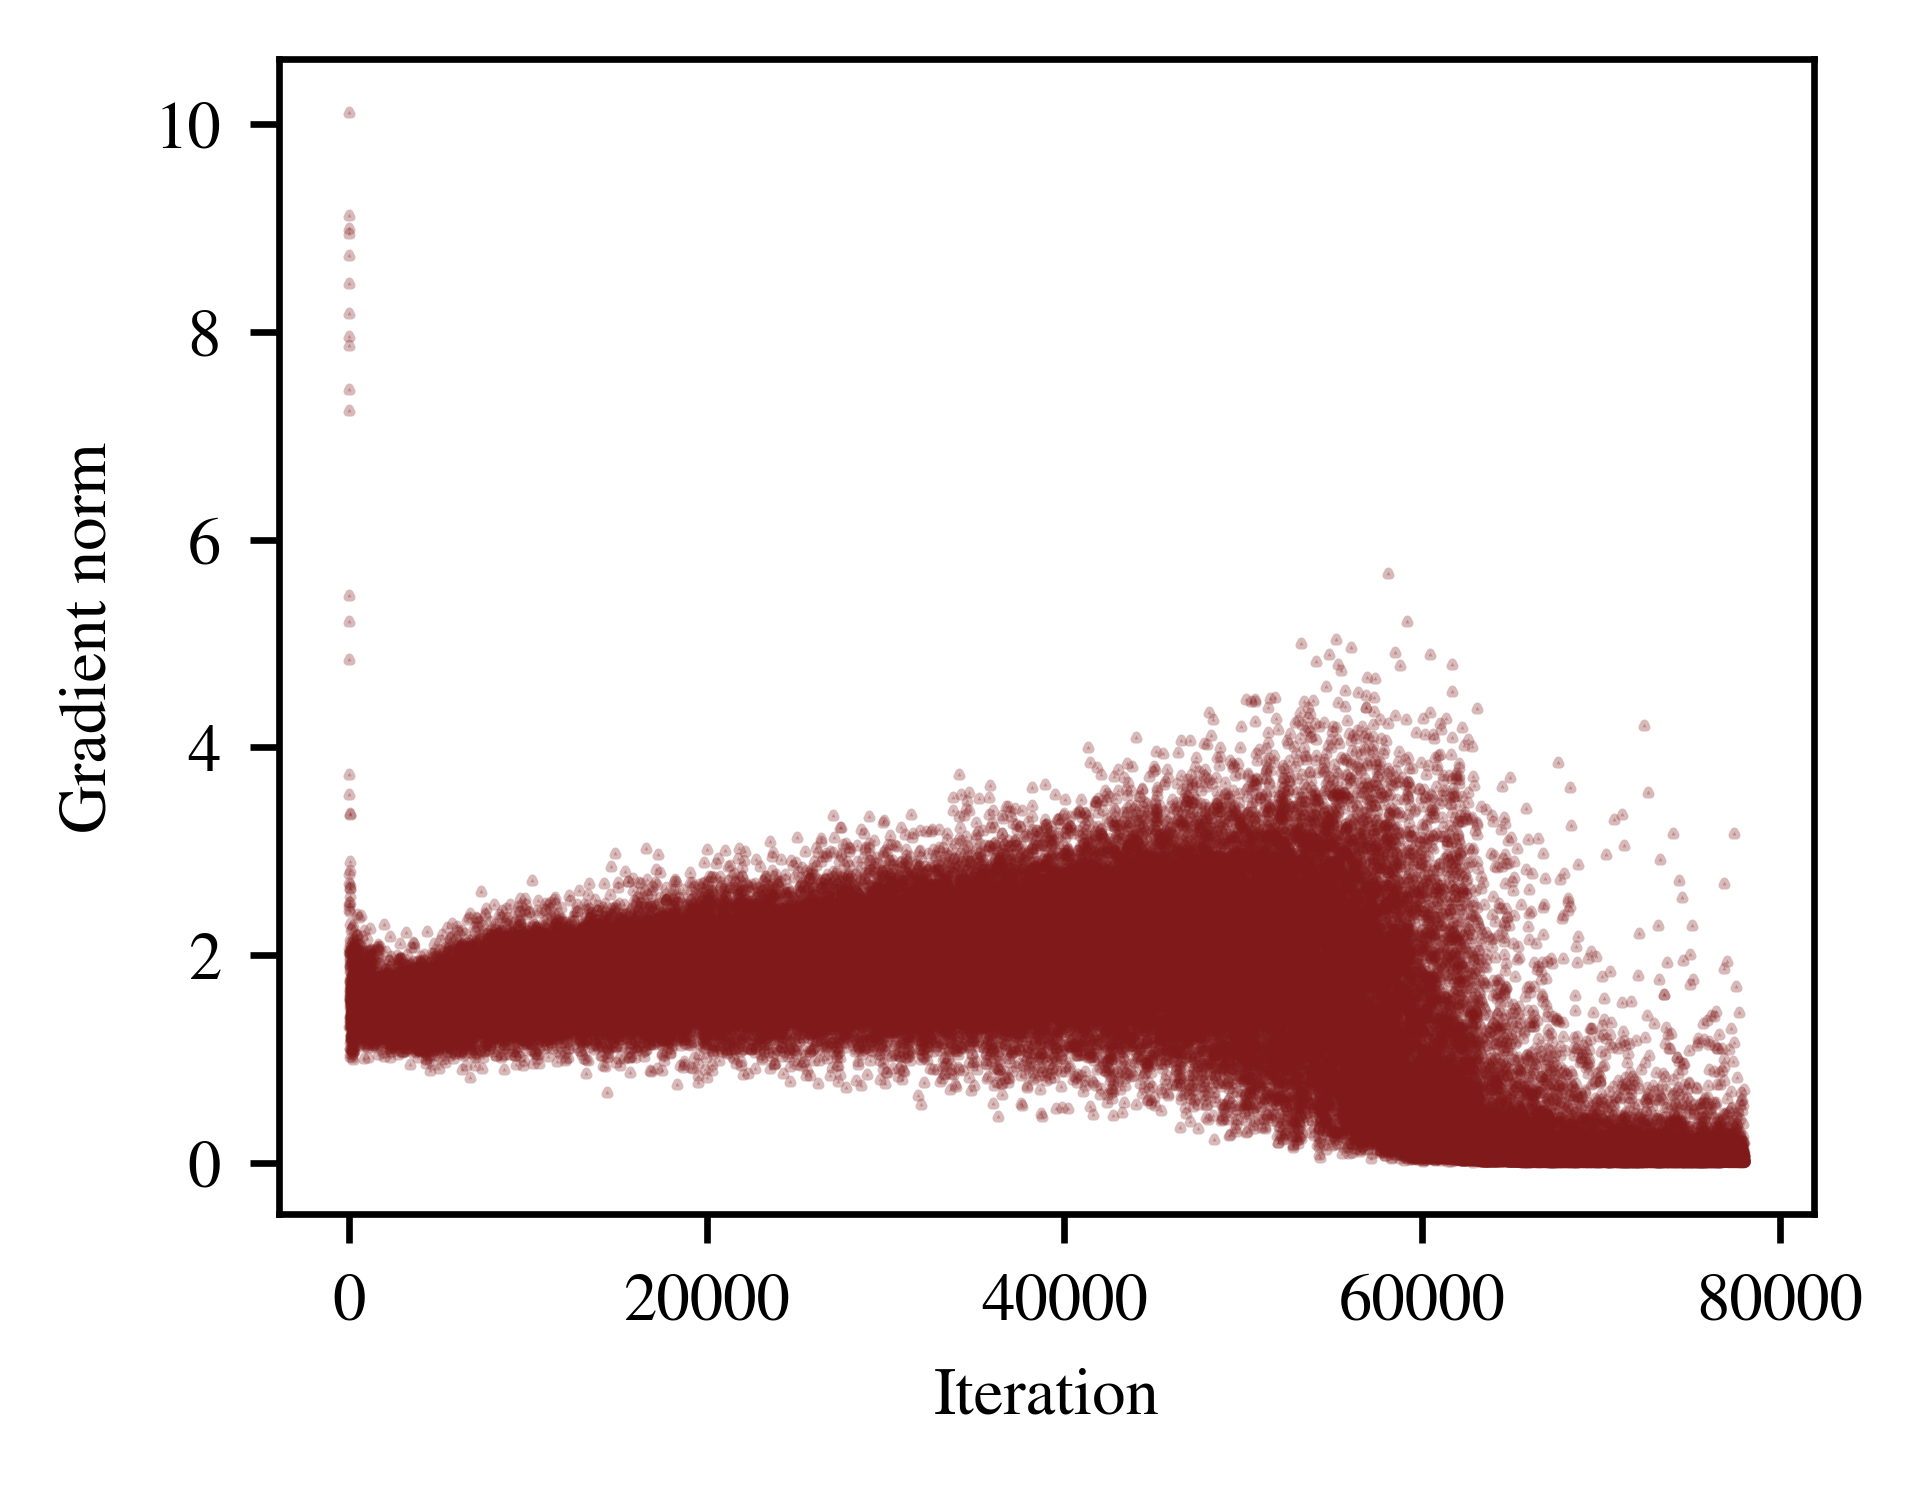

In [10]:
import numpy as np
# from turtle import color
import torch
import matplotlib.pyplot as plt
import matplotlib
import os
import time
import datetime
import matplotlib.cm as cm

def plot_grad_norm(grads, num_dims, losses, namebase):
    namebase = namebase+'/'
    plt.style.use(['ieee'])
    # plt.style.use(['seaborn-paper'])
    matplotlib.rcParams.update(
        {
            'text.usetex': False,
            'font.family': 'stixgeneral',
            'mathtext.fontset': 'stix',
            'font.size': 8,  # Change the font size to 16

            }
    )
    colors = cm.RdBu(np.linspace(0, 1, 10))

    cur_time = datetime.datetime.now().strftime('%Y-%m-%d-%H:%M:%S')
    plt.tight_layout()  
    print('grads.device',grads.device)  
    if grads.device != 'cpu':
        grads = grads.to('cpu')
    # print('grads',grads)  
    # steps = np.array(list(range(0, grads.shape[0])))
    steps = torch.linspace(0, grads.shape[0], grads.shape[0])
    fig, ax = plt.subplots()
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlabel('Loss', fontsize='xx-large')
    # ax.set_ylabel('Gradient norm', fontsize='xx-large')
    ax.set_xlabel('Loss', fontsize='xx-large')
    ax.set_ylabel('Gradient norm', fontsize='xx-large')    
    # ax.set_xlim(0,0.01)
    # ax.set_ylim(0,2)
    # for i in range(grads.size(0)):
        # ax.plot(losses, grads[:, i], alpha=0.05, linewidth=1, linestyle='-',color=(0.15, 0.25, 0.4))
    # ax.scatter(losses,grads,alpha=0.3, s=0.2,color=(0.1, 0.25, 0.4))
    mask = np.logical_and(losses >= 0, losses <= max(losses))
    
    # mask = np.logical_and(losses >= 0, losses <= 0.01)
    # mask = np.logical_and(losses >= 2.5, losses <= max(losses))

    losses = losses[mask]
    grads = grads[mask]
    steps = steps[mask]
    # scatter = ax.scatter(losses,grads,alpha=0.8, s=0.2,c=steps)
    scatter = ax.scatter(losses,grads,alpha=0.8, s=5,c=steps)
    
    cb = plt.colorbar(scatter)
    cb.set_label('Iteration', fontsize='xx-large')
    plt.tick_params( 'both', labelsize='large')
    # plt.show()
    fname = namebase+cur_time+'dim'+str(num_dims)+'gradient_norm_Loss.pdf'
    plt.tight_layout()  
    # plt.show()
    plt.savefig(fname, format='pdf',bbox_inches = 'tight')



    fig, ax = plt.subplots()
    # ax.set_xscale('log')
    # ax.set_yscale('log')    
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Gradient norm')
    # ax.set_xlim(5e4,max(steps))
    # ax.set_ylim(0,4)
    # for i in range(grads.size(0)):
        # ax.plot(grads[:, i], alpha=0.05, linewidth=1, linestyle='-', color=(0.5,0.1, 0.1))  
    ax.scatter(steps, grads,alpha=0.3, marker='^',s=0.2,color=(0.5,0.1, 0.1))   
    # plt.show()
    fname = namebase+cur_time+'dim'+str(num_dims)+'gradient_norm_Iteration.pdf'
    print('fname',fname)
    # plt.show()
    plt.savefig(fname, format='pdf',bbox_inches = 'tight')

namebase = '/media/bdc/clm/DeformingTheLossSurface/Sparse-Sharpness-Aware-Minimization-main/logs/CIFAR10_base_bsz128_epoch200_resnet18_lr0.05_sgd_seed1234act_None_set_singlerun_coe0_1.0coe1_1.0coe2_1.01.0_0.93None1.0None2023-08-25-15:52:30'

loss_path = namebase+'/losses.pt'
grads_path = namebase+'/grads.pt'
losses = torch.load(loss_path)
grads = torch.load(grads_path)

plot_grad_norm(grads, 0, losses, namebase)
print('Done')